## Jugando con Probabilidades y Python


### La coincidencia de cumpleaños

Aquí vemos la solución de la paradija del cumpleaños que vimos en el apartado de proabilidad.

La [paradoja del cumpleaños](https://es.wikipedia.org/wiki/Paradoja_del_cumplea%C3%B1os) es un problema muy conocido en el campo de la probabilidad. Plantea las siguientes interesantes preguntas: ¿Cuál es la probabilidad de que, en un grupo de personas elegidas al azar, al menos dos de ellas habrán nacido el mismo día del año? ¿Cuántas personas son necesarias para asegurar una probabilidad mayor al 50%?. 

Calcular esa probabilidad es complicado, así que vamos a calcular la probabilidad de que no coincidad, suponinedo que con eventos independietes (es decir las podemos multiplicar), y luego calcularemos la probabilidad de que coincidan como 1 menos esa probabilidad. 

Excluyendo el 29 de febrero de nuestros cálculos y asumiendo que los restantes 365 días de posibles cumpleaños son igualmente probables, vamos a calcular esas dós cuestiones.

In [ ]:
# Ejemplo situación 2 La coincidencia de cumpleaños

prob = 1.0
asistentes = 50

# calculamos la probabilidad de coincidencia para 50 asistentes

for i in range(asistentes):
    prob = prob * (365-i)/365

print("Probabilidad de que compartan una misma fecha de cumpleaños es {0:.2f}"
      .format(1 - prob))

# Calculamos el número de asistentes necesarios para asegurar 
# que la probabilidad de coincidencia sea mayor del 50%

asistentes=0
prob= 1 
while prob > 0.5:
    prob = prob * (365-i)/365
    asistentes +=1

print("Para asegurar que la probabilidad es mayor del 50% necesitamos {0} asistentes".format(asistentes))

Probabilidad de que compartan una misma fecha de cumpleaños es 0.97
Para asegurar que la probabilidad es mayor del 50% necesitamos 5 asistentes


## Variables aleatorias. Vamos a tirar un dado

Vamos a trabajar con variables discretas, y en este caso vamos a vamos a reproducir un dado con la librería `random` que forma parte de la librería estandar de Python:

In [ ]:
# importa la libreria random. puedes utilizar dir() para entender lo que ofrece
import random

In [ ]:
# utiliza help para obtener ayuda sobre el metodo randint
help(random.randint)

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



In [ ]:
# utiliza randint() para simular un dado y haz una tirada
tirada = random.randint(1, 6)
print(tirada)

5


In [ ]:
# ahora haz 20 tiradas, y crea una lista con las tiradas
tiradas = [random.randint(1, 6) for i in range(20)]

In [ ]:
# Vamos a calcular la media de las tiradas
import numpy as np
np.mean(tiradas)

3.05

In [ ]:
# Calcula ahora la mediana

np.median(tiradas)

3.0

In [ ]:
# Calcula la moda de las tiradas 
from scipy import stats
stats.mode(tiradas)



ModeResult(mode=array([4]), count=array([6]))

In [ ]:
# se te ocurre otra forma de calcularla?
# dic_modas = {}
# for tirada in tiradas:
#   if tirada in dic_modas.keys():
#     dic_modas[tirada] = dic_modas[tirada] + 1
#   else:
#     dic_modas[tirada] = 1

max_tirada = []
max_conteo = 0
for tirada, conteo in dic_modas.items():
  if conteo > max_conteo:
    max_tirada = [tirada]
    max_conteo = conteo
  elif conteo == max_conteo:
    max_tirada.append(tirada)

print(f"Tirada moda: {max_tirada}")
print(f"Nº repes: {max_conteo}")
  

NameError: ignored

In [ ]:
dic_modas

{1: 2, 2: 4, 3: 2, 4: 4, 5: 1, 6: 4}

## Viendo como evoluciona el número de 6 cuando sacamos más jugadas

Vamos a ver ahora como evoluciona el número de seises que obtenemos al lanzar el dado 10000 veces. Vamos a crear una lista en la que cada elemento sea el número de ocurrencias del número 6 dividido entre el número de lanzamientos. 

crea una lista llamadada ``frecuencia_seis[]`` que almacene estos valores 


In [ ]:
import random

n_tiradas = 20
n_experimentos = 10000

frecuencia_seis = []
for i in range(n_experimentos):
  tiradas = [random.randint(1, 6)/n_tiradas for i in range(n_tiradas)]
  frecuencia_seis.append(sum(tiradas)/n_tiradas)





### Vamos a tratar de hacerlo gráficamente
¿Hacia que valor debería converger los números que forman la lista frecuencia_seis? 
Revisa la ley de los grandes números para la moneda, y aplica un poco de lógica para este caso.


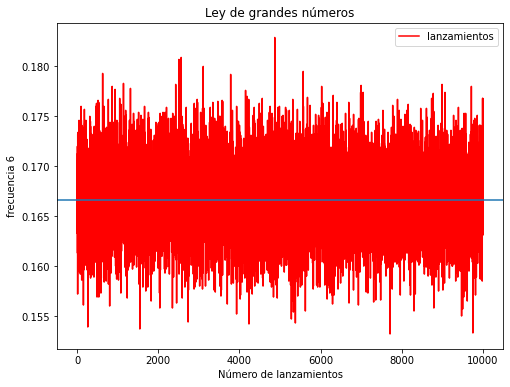

In [ ]:
# <!-- collapse=True -->
# importando modulos necesarios
import matplotlib.pyplot as plt 
import numpy as np # importando numpy
import pandas as pd # importando pandas

np.random.seed(2131982) # para poder replicar el random

%matplotlib inline

import pandas as pd

resultados = []
n_tiradas = 10000
for lanzamientos in range(1,10000):
    tiradas = [random.randint(1, 6)==6 for i in range(n_tiradas)]
    resultados.append(np.mean(tiradas))
    
# graficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8, 6))
plt.axhline(1/6)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia 6")
plt.show()
#

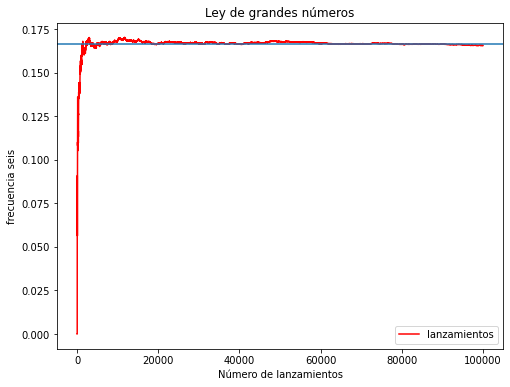

In [ ]:
lista2 = []
frecuencia_seis = []
for i in range (100000):
  lista2.append(random.randint(1,6))
ocurrencias = 0
lanzamientos = 1
for i in lista2:
  frecuencia_seis.append(ocurrencias / lanzamientos)
  lanzamientos = lanzamientos + 1
  if i == 6:
    ocurrencias = ocurrencias + 1


%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # importando numpy
import pandas as pd # importando pandas
df = pd.DataFrame({ 'lanzamientos' : frecuencia_seis})
df.plot(title='Ley de grandes números',color='r',figsize=(8, 6))
plt.axhline(1/6)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia seis")
plt.show()

In [ ]:
len(lista2)

1000

# Resolviendo el problema de Monty Hall

Este problema, más conocido con el nombre de [Monty Hall](https://es.wikipedia.org/wiki/Problema_de_Monty_Hall).
En primer lugar trata de simular el problema de Monty Hall con Python, para ver cuantas veces gana el concursante y cuantas pierde. Realiza por ejemplo 10000 simulaciones del problema, en las que el usuario cambia siempre de puerta. Después puedes comparar con 10000 simulaciones en las que el usuario no cambie de puertas.
Cuales son los resultados?


### Monty Hall sin Bayes - Simulación

In [ ]:

# vamos a tratar de solucionar el problema de Monty Hall simulando como jugaría el jugador
# Simula 10000 jugadas
# Puedes escoger a priori la estrategia: haz 10000 simulaciones en las que el jugador siempre cambie la puerta
# y también puedes ejecutar 10000 en las que no cambie


# SIN CAMBIAR:
victoria = 0
derrota = 0

for i in range(10000):
  # Cogemos la puerta del premio
  puerta = np.random.randint(1, 4)

  # Simulamos elección concursante:
  concursante = np.random.randint(1, 4)

  # Sin cambiar:
  if concursante == puerta:
    victoria += 1
  else:
    derrota += 1

print(f"Sin cambiar, gano el {victoria/(victoria+derrota)*100} % veces")

# CAMBIANDO:
victoria, derrota = 0, 0

for i in range(10000):
  # Cogemos la puerta del premio
  puerta = np.random.randint(1, 4)

  # Simulamos elección concursante:
  concursante = np.random.randint(1, 4)

  # # El presentador quita una puerta:
  # elecciones = [concursante, puerta]
  # concursante = random.choice(elecciones)


  # Cambiando:
  if concursante != puerta:
    victoria += 1
  else:
    derrota += 1

print(f"Cambiando, gano el {victoria/(victoria+derrota)*100} % veces")



Sin cambiar, gano el 33.12 % veces
Cambiando, gano el 66.08000000000001 % veces


## Monthy Hall - una aproximación bayesiana

Trata de resolver ahora el problema de Monthy Hall utilizando el teorema de Bayes.
Puedes escribir la solución, o programar el código. Lo que prefieras.

In [ ]:
EXPLICACIÓN MATEMÁTICA
Lo explicaremos matemáticamente, con probabilidades condicionadas.

Definimos cuidadosamente los siguientes sucesos . Asumimos que hay dos tipos de jugador, los que nunca cambian de puerta y los que cambian siempre; en este caso la pregunta se limita a ver que tipo de jugador tiene la mayor probabilidad de ganar el coche.

Suceso	Descripción
A	El jugador selecciona la puerta que contiene el coche en su selección inicial.
B	El jugador selecciona una puerta que contiene una cabra en su selección inicial.
G	El jugador gana el coche.
Estamos interesados en calcular P(G) para cada tipo de jugador.

Para calcular P(G), basta con notar que G=(G ∩ A) U (G ∩ B) ya que A ∩ B = Ø

P(G)=P((G ∩ A) U (G ∩ B)) =
         P(G ∩ A) + P(G ∩ B)=
         P(G/A)P(A) + P(G/B)P(B)

En cualquier caso, dado que no tenemos ninguna razón para pensar lo contrario, diremos que P(A) = 1/3 y P(B) = 2/3 pues hay un coche y dos cabras.

Ahora debemos definir que tipo de jugador estamos estudiando.

Jugador que nunca se cambia.
En este caso P(G|A) = 1 y P(G|B) = 0 pues el jugador se queda con su selección inicial.
Por lo tanto P(G) = 1/3.

Jugador que siempre se cambia.
En este caso P(G|A) = 0 y P(G|B) = 1 pues el jugador se cambia a la única puerta cerrada que queda (y sabemos que como el presentador sabe donde esta el coche, siempre mostrará una cabra).
Por lo tanto P(G) = 2/3.
Claramente la mejor estrategia es cambiar siempre, pues la probabilidad efectiva de ganar es el doble de la correspondiente al jugador que no cambia nunca.

# El problema de las Cookies

Imagina que tienes 2 botes con galletas. El primero contiene 30 cookies de vainilla y 10 cookies de chocolate. El segundo bote tiene 20 cookies de chocolate y 20 cookies de vainilla.

Ahora vamos a suponer que sacamos un cookie sin ver de que bote lo sacamos. El cookie es de vainilla. ¿Cuál es la probabilidad de que el cookie venga del primer bote?


## El problema de los M&Ms 

En 1995 M&Ms lanzó los M&M’s azules. 

- Antes de ese año la distibución de una bolsa era: 30% Marrones, 20% Amarillos, 20% Rojos, 10% Verdes, 10% Naranjas, 10% Marron Claros. 
- Después de 1995 la distribución en una bolsa era la siguiente: 24% Azul , 20% Verde, 16% Naranjas, 14% Amarillos, 13% Rojos, 13% Marrones

Sin saber qué bolsa es cúal, sacas un M&Ms al azar de cada bolsa. Una es amarilla y otra es verde. ¿Cuál es la probabilidad de que la bolsa de la que salió el caramelo amarillo sea una bolsa de 1994?

Pista: Para calcular la probabilidad a posteriori (likelihoods), tienes que multiplicar las probabilidades de sacar un amarillo de una bolsa y un verde de la otra, y viceversa.


¿Cuál es la probabilidad de que el caramelo amarillo viniera de una bolsa de 1996?


# Creando un clasificador basado en el teorema de Bayes

Este es un problema extraido de la página web de Chris Albon, que ha replicado un ejemplo que puedes ver en la wikipedia. Trata de reproducirlo y entenderlo.  

Naive bayes is simple classifier known for doing well when only a small number of observations is available. In this tutorial we will create a gaussian naive bayes classifier from scratch and use it to predict the class of a previously unseen data point. This tutorial is based on an example on Wikipedia's [naive bayes classifier page](https://en.wikipedia.org/wiki/Naive_Bayes_classifier), I have implemented it in Python and tweaked some notation to improve explanation. 

## Preliminaries

In [ ]:
import pandas as pd
import numpy as np

## Create Data

Our dataset is contains data on eight individuals. We will use the dataset to construct a classifier that takes in the height, weight, and foot size of an individual and outputs a prediction for their gender.

In [ ]:
# Create an empty dataframe
data = pd.DataFrame()

# Create our target variable
data['Gender'] = ['male','male','male','male','female','female','female','female']

# Create our feature variables
data['Height'] = [6,5.92,5.58,5.92,5,5.5,5.42,5.75]
data['Weight'] = [180,190,170,165,100,150,130,150]
data['Foot_Size'] = [12,11,12,10,6,8,7,9]

# View the data
data

,Gender,Height,Weight,Foot_Size
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6
5,female,5.50,150,8
6,female,5.42,130,7
7,female,5.75,150,9


The dataset above is used to construct our classifier. Below we will create a new person for whom we know their feature values but not their gender. Our goal is to predict their gender.

In [ ]:
# Create an empty dataframe
person = pd.DataFrame()

# Create some feature values for this single row
person['Height'] = [6]
person['Weight'] = [130]
person['Foot_Size'] = [8]

# View the data 
person

,Height,Weight,Foot_Size
0,6,130,8


## Bayes Theorem

Bayes theorem is a famous equation that allows us to make predictions based on data. Here is the classic version of the Bayes theorem:

$$\displaystyle P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}}$$

This might be too abstract, so let us replace some of the variables to make it more concrete. In a bayes classifier, we are interested in finding out the class (e.g. male or female, spam or ham) of an observation _given_ the data:

$$p(\text{class} \mid \mathbf {\text{data}} )={\frac {p(\mathbf {\text{data}} \mid \text{class}) * p(\text{class})}{p(\mathbf {\text{data}} )}}$$

where: 

- $\text{class}$ is a particular class (e.g. male)
- $\mathbf {\text{data}}$ is an observation's data
- $p(\text{class} \mid \mathbf {\text{data}} )$ is called the posterior
- $p(\text{data|class})$ is called the likelihood
- $p(\text{class})$ is called the prior
- $p(\mathbf {\text{data}} )$ is called the marginal probability

In a bayes classifier, we calculate the posterior (technically we only calculate the numerator of the posterior, but ignore that for now) for every class for each observation. Then, classify the observation based on the class with the largest posterior value. In our example, we have one observation to predict and two possible classes (e.g. male and female), therefore we will calculate two posteriors: one for male and one for female.

$$p(\text{person is male} \mid \mathbf {\text{person's data}} )={\frac {p(\mathbf {\text{person's data}} \mid \text{person is male}) * p(\text{person is male})}{p(\mathbf {\text{person's data}} )}}$$

$$p(\text{person is female} \mid \mathbf {\text{person's data}} )={\frac {p(\mathbf {\text{person's data}} \mid \text{person is female}) * p(\text{person is female})}{p(\mathbf {\text{person's data}} )}}$$

## Gaussian Naive Bayes Classifier

A gaussian naive bayes is probably the most popular type of bayes classifier. To explain what the name means, let us look at what the bayes equations looks like when we apply our two classes (male and female) and three feature variables (height, weight, and footsize):

$${\displaystyle {\text{posterior (male)}}={\frac {P({\text{male}})\,p({\text{height}}\mid{\text{male}})\,p({\text{weight}}\mid{\text{male}})\,p({\text{foot size}}\mid{\text{male}})}{\text{marginal probability}}}}$$

$${\displaystyle {\text{posterior (female)}}={\frac {P({\text{female}})\,p({\text{height}}\mid{\text{female}})\,p({\text{weight}}\mid{\text{female}})\,p({\text{foot size}}\mid{\text{female}})}{\text{marginal probability}}}}$$

Now let us unpack the top equation a bit:

- $P({\text{male}})$ is the prior probabilities. It is, as you can see, simply the probability an observation is male. This is just the number of males in the dataset divided by the total number of people in the dataset.
- $p({\text{height}}\mid{\text{female}})\,p({\text{weight}}\mid{\text{female}})\,p({\text{foot size}}\mid{\text{female}})$ is the likelihood. Notice that we have unpacked $\mathbf {\text{person's data}}$ so it is now every feature in the dataset. The "gaussian" and "naive" come from two assumptions present in this likelihood:
    1. If you look each term in the likelihood you will notice that we assume each feature is uncorrelated from each other. That is, foot size is independent of weight or height etc.. This is obviously not true, and is a "naive" assumption - hence the name "naive bayes."
    2. Second, we assume have that the value of the features (e.g. the height of women, the weight of women) are normally (gaussian) distributed. This means that $p(\text{height}\mid\text{female})$ is calculated by inputing the required parameters into the probability density function of the normal distribution: 

$$ 
p(\text{height}\mid\text{female})=\frac{1}{\sqrt{2\pi\text{variance of female height in the data}}}\,e^{ -\frac{(\text{observation's height}-\text{average height of females in the data})^2}{2\text{variance of female height in the data}} }
$$

- $\text{marginal probability}$ is probably one of the most confusing parts of bayesian approaches. In toy examples (including ours) it is completely possible to calculate the marginal probability. However, in many real-world cases, it is either extremely difficult or impossible to find the value of the marginal probability (explaining why is beyond the scope of this tutorial). This is not as much of a problem for our classifier as you might think. Why? Because we don't care what the true posterior value is, we only care which class has a the highest posterior value. And because the marginal probability is the same for all classes 1) we can ignore the denominator, 2) calculate only the posterior's numerator for each class, and 3) pick the largest numerator. That is, we can ignore the posterior's denominator and make a prediction solely on the relative values of the posterior's numerator.

Okay! Theory over. Now let us start calculating all the different parts of the bayes equations.

## Calculate Priors

Priors can be either constants or probability distributions. In our example, this is simply the probability of being a gender. Calculating this is simple:

In [ ]:
# Number of males
n_male = data['Gender'][data['Gender'] == 'male'].count()

# Number of males
n_female = data['Gender'][data['Gender'] == 'female'].count()

# Total rows
total_ppl = data['Gender'].count()

In [ ]:
# Number of males divided by the total rows
P_male = n_male/total_ppl

# Number of females divided by the total rows
P_female = n_female/total_ppl

## Calculate Likelihood

Remember that each term (e.g. $p(\text{height}\mid\text{female})$) in our likelihood is assumed to be a normal pdf. For example:

$$ 
p(\text{height}\mid\text{female})=\frac{1}{\sqrt{2\pi\text{variance of female height in the data}}}\,e^{ -\frac{(\text{observation's height}-\text{average height of females in the data})^2}{2\text{variance of female height in the data}} }
$$

This means that for each class (e.g. female) and feature (e.g. height) combination we need to calculate the variance and mean value from the data. Pandas makes this easy:

In [ ]:
# Group the data by gender and calculate the means of each feature
data_means = data.groupby('Gender').mean()

# View the values
data_means

,Height,Weight,Foot_Size
Gender,,,
female,5.4175,132.50,7.50
male,5.8550,176.25,11.25


In [ ]:
# Group the data by gender and calculate the variance of each feature
data_variance = data.groupby('Gender').var()

# View the values
data_variance

,Height,Weight,Foot_Size
Gender,,,
female,0.097225,558.333333,1.666667
male,0.035033,122.916667,0.916667


Now we can create all the variables we need. The code below might look complex but all we are doing is creating a variable out of each cell in both of the tables above.

In [ ]:
# Means for male
male_height_mean = data_means['Height'][data_variance.index == 'male'].values[0]
print(male_height_mean)
male_weight_mean = data_means['Weight'][data_variance.index == 'male'].values[0]
male_footsize_mean = data_means['Foot_Size'][data_variance.index == 'male'].values[0]

# Variance for male
male_height_variance = data_variance['Height'][data_variance.index == 'male'].values[0]
male_weight_variance = data_variance['Weight'][data_variance.index == 'male'].values[0]
male_footsize_variance = data_variance['Foot_Size'][data_variance.index == 'male'].values[0]

# Means for female
female_height_mean = data_means['Height'][data_variance.index == 'female'].values[0]
female_weight_mean = data_means['Weight'][data_variance.index == 'female'].values[0]
female_footsize_mean = data_means['Foot_Size'][data_variance.index == 'female'].values[0]

# Variance for female
female_height_variance = data_variance['Height'][data_variance.index == 'female'].values[0]
female_weight_variance = data_variance['Weight'][data_variance.index == 'female'].values[0]
female_footsize_variance = data_variance['Foot_Size'][data_variance.index == 'female'].values[0]

5.855


Finally, we need to create a function to calculate the probability density of each of the terms of the likelihood (e.g. $p(\text{height}\mid\text{female})$).

In [ ]:
# Create a function that calculates p(x | y):
def p_x_given_y(x, mean_y, variance_y):

    # Input the arguments into a probability density function
    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    
    # return p
    return p

## Apply Bayes Classifier To New Data Point

Alright! Our bayes classifier is ready. Remember that since we can ignore the marginal probability (the demoninator), what we are actually calculating is this:

$${\displaystyle {\text{numerator of the posterior}}={P({\text{female}})\,p({\text{height}}\mid{\text{female}})\,p({\text{weight}}\mid{\text{female}})\,p({\text{foot size}}\mid{\text{female}})}{}}$$

To do this, we just need to plug in the values of the unclassified person (height = 6), the variables of the dataset (e.g. mean of female height), and the function (`p_x_given_y`) we made above:

In [ ]:
person

,Height,Weight,Foot_Size
0,6,130,8


In [ ]:
# Numerator of the posterior if the unclassified observation is a male
P_male * \
p_x_given_y(person['Height'][0], male_height_mean, male_height_variance) * \
p_x_given_y(person['Weight'][0], male_weight_mean, male_weight_variance) * \
p_x_given_y(person['Foot_Size'][0], male_footsize_mean, male_footsize_variance)

6.197071843878078e-09

In [ ]:
# Numerator of the posterior if the unclassified observation is a female
P_female * \
p_x_given_y(person['Height'][0], female_height_mean, female_height_variance) * \
p_x_given_y(person['Weight'][0], female_weight_mean, female_weight_variance) * \
p_x_given_y(person['Foot_Size'][0], female_footsize_mean, female_footsize_variance)

0.0005377909183630018

Because the numerator of the posterior for female is greater than male, then we predict that the person is female.


Comprobamos si es cierto:

In [ ]:
# Create an empty dataframe
person = pd.DataFrame()

# Create some feature values for this single row
person['Height'] = [5.8]
person['Weight'] = [176]
person['Foot_Size'] = [10.5]


# Numerator of the posterior if the unclassified observation is a male
P_male * \
p_x_given_y(person['Height'][0], male_height_mean, male_height_variance) * \
p_x_given_y(person['Weight'][0], male_weight_mean, male_weight_variance) * \
p_x_given_y(person['Foot_Size'][0], male_footsize_mean, male_footsize_variance)


0.011257414015349238

In [ ]:
# Numerator of the posterior if the unclassified observation is a female
P_female * \
p_x_given_y(person['Height'][0], female_height_mean, female_height_variance) * \
p_x_given_y(person['Weight'][0], female_weight_mean, female_weight_variance) * \
p_x_given_y(person['Foot_Size'][0], female_footsize_mean, female_footsize_variance)


1.941522793697582e-05